<a href="https://colab.research.google.com/github/Hemanth0411/EDA-with-Python/blob/main/EDA_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Data Visualisation

In [ ]:
iris = pd.read_csv("/content/drive/MyDrive/DataSets/iris.data.csv")
iris.head()

,petal_length,petal_width,sepal_length,sepal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
sample1 = iris.sample(n=6, replace=False)
print(sample1.iloc[:,-3:])

     sepal_length  sepal_width          species
85            4.5          1.6  Iris-versicolor
102           5.9          2.1   Iris-virginica
139           5.4          2.1   Iris-virginica
61            4.2          1.5  Iris-versicolor
54            4.6          1.5  Iris-versicolor
110           5.1          2.0   Iris-virginica


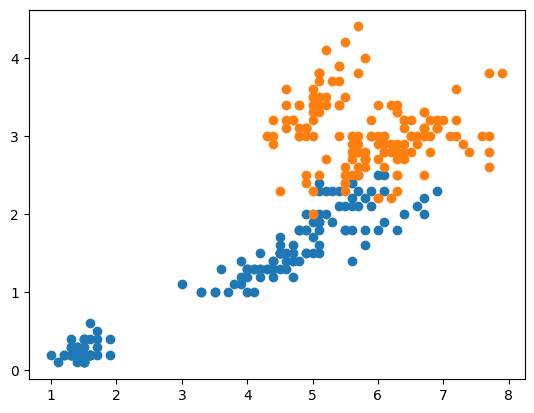

In [ ]:
plt.plot(iris.sepal_length,
         iris.sepal_width,
         ls=" ", marker="o",
         label = 'sepal')
plt.plot(iris.petal_length,
         iris.petal_width,
         ls=' ', marker = 'o',
         label='petal')
plt.show()
plt.show()

(array([ 4.,  5.,  7., 16.,  9.,  5., 13., 14., 10.,  6., 10., 16.,  7.,
        11.,  4.,  2.,  4.,  1.,  5.,  1.]),
 array([4.3 , 4.48, 4.66, 4.84, 5.02, 5.2 , 5.38, 5.56, 5.74, 5.92, 6.1 ,
        6.28, 6.46, 6.64, 6.82, 7.  , 7.18, 7.36, 7.54, 7.72, 7.9 ]),
 <BarContainer object of 20 artists>)

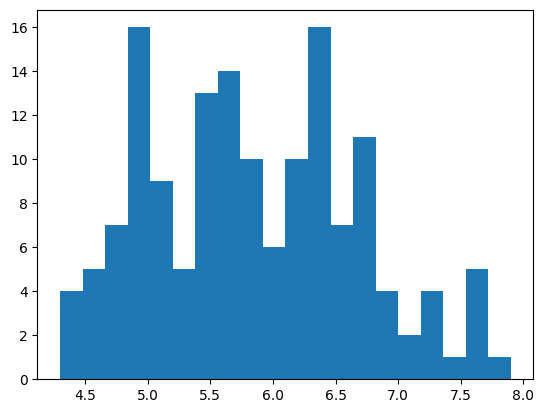

In [ ]:
plt.hist(iris.petal_length, bins=20)

[Text(0.5, 0, 'xlabel'), Text(0, 0.5, 'ylabel'), Text(0.5, 1.0, 'Title')]

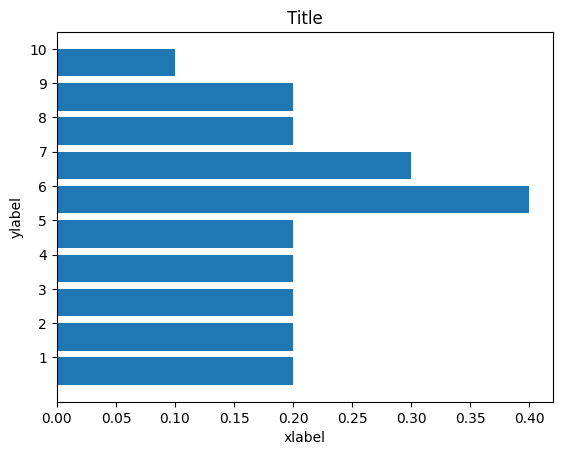

In [ ]:
#  Customizing Plots

fig, ax = plt.subplots()
ax.barh(np.arange(10),
        iris.sepal_width.iloc[:10])

ax.set_yticks(np.arange(0.4,10.4,1.0))
ax.set_yticklabels(np.arange(1,11))
ax.set(xlabel='xlabel', ylabel='ylabel', title='Title')

<Axes: xlabel='species'>

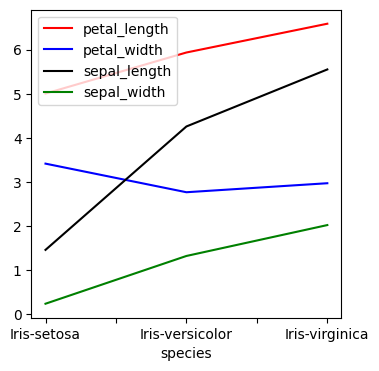

In [ ]:
iris.groupby('species').mean().plot(color=['red', 'blue', 'black', 'green'], fontsize=10, figsize=(4,4))

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


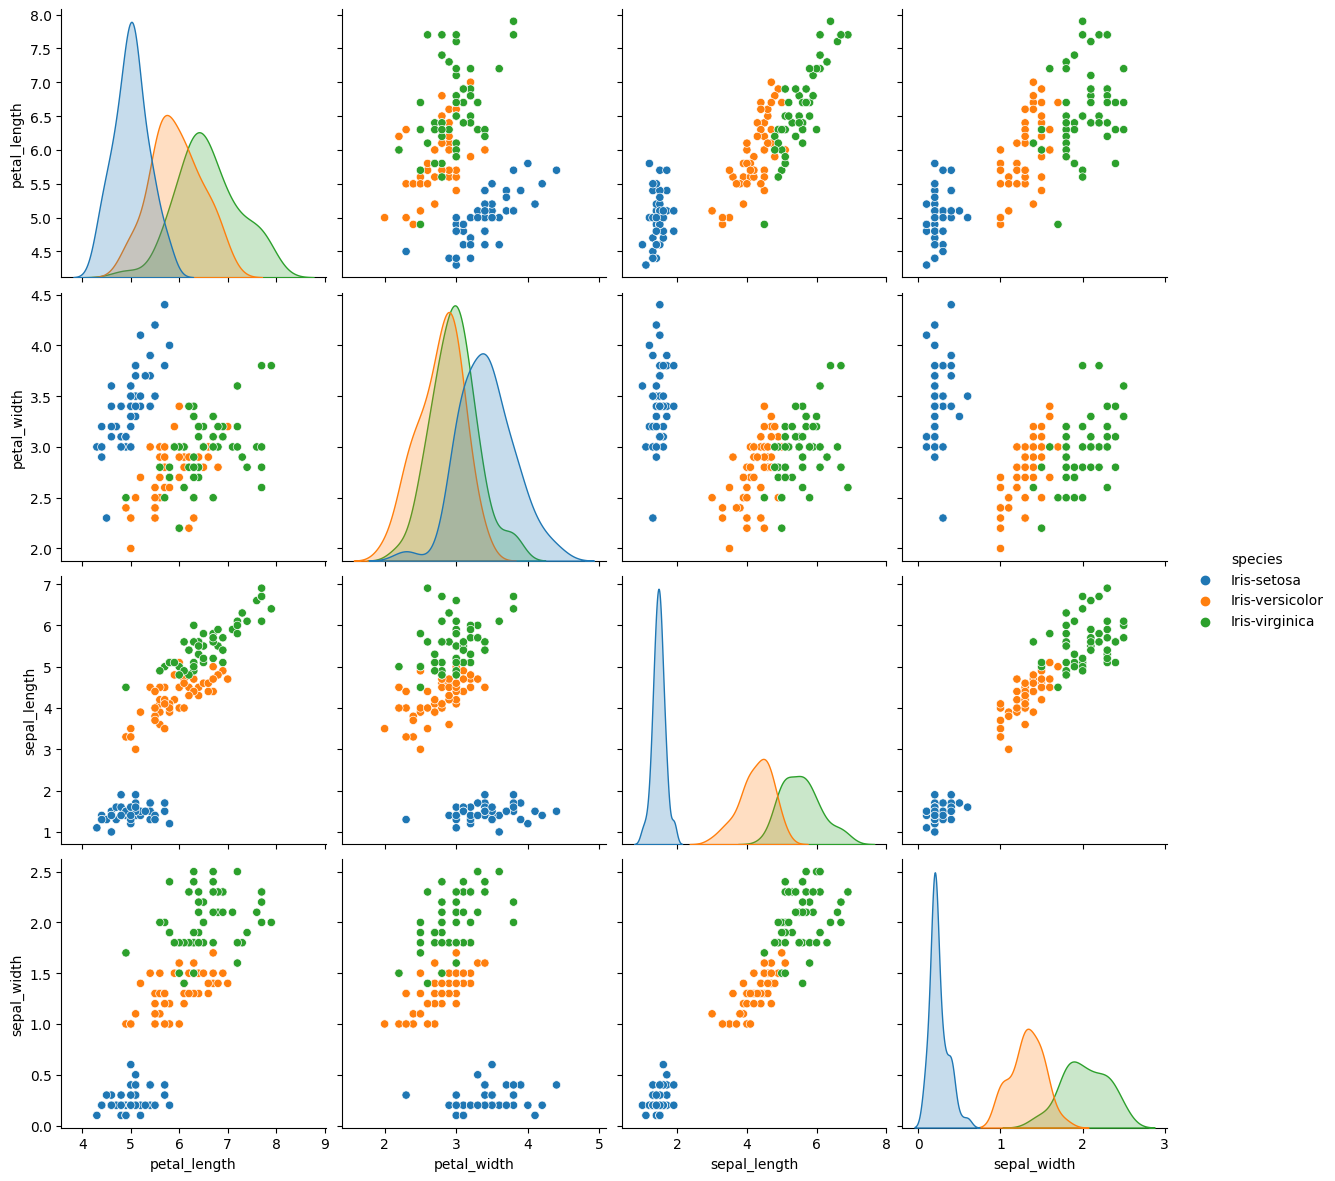

In [ ]:
sns.pairplot(iris, hue='species', size=3)
plt.show()

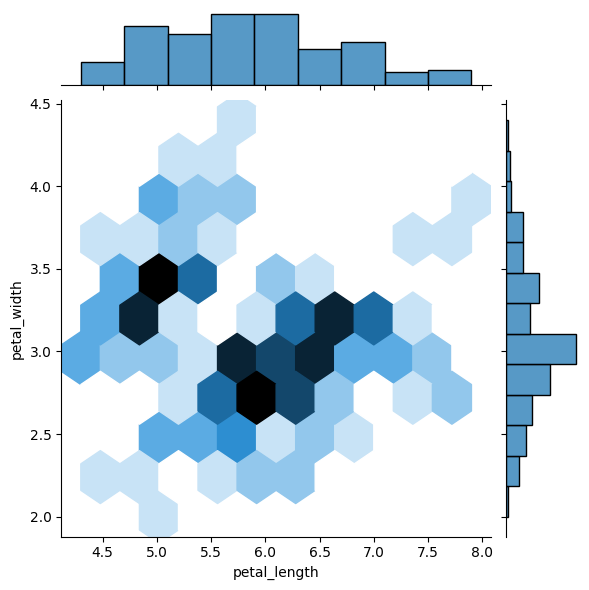

In [ ]:
# Seaborn hexbin Plot

sns.jointplot(x=iris['petal_length'],
              y=iris['petal_width'],
              kind='hex')
plt.show()

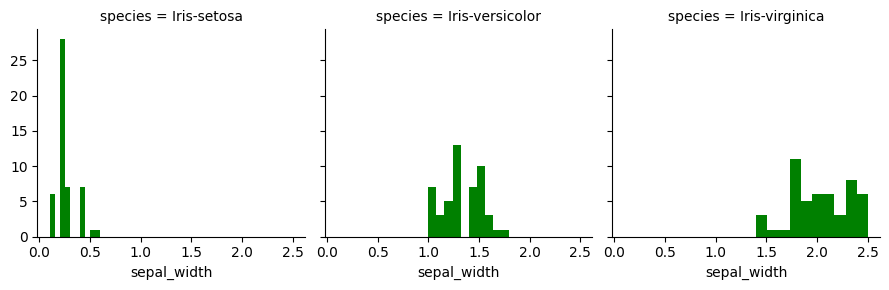

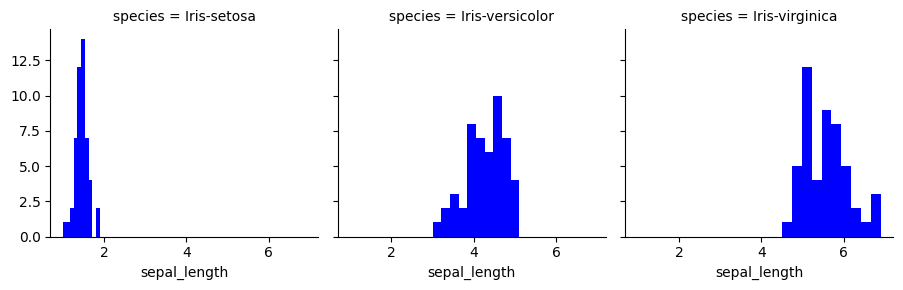

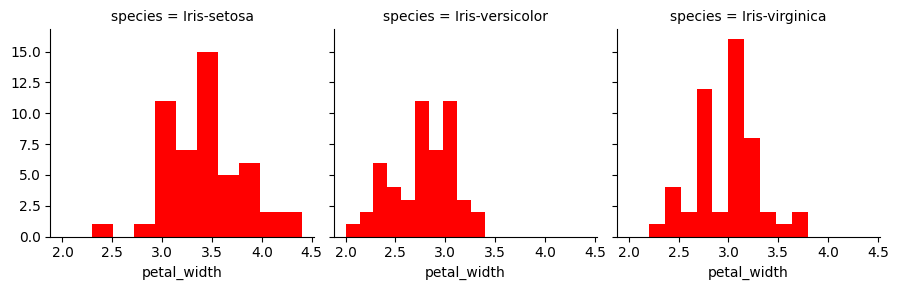

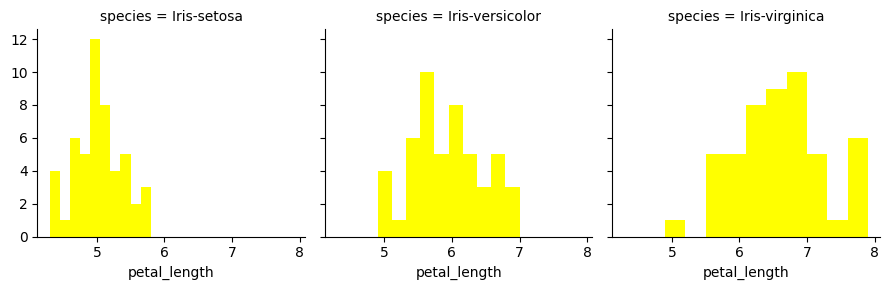

In [ ]:
# Seaborn Plot Facet Grid

plot = sns.FacetGrid(iris, col='species', margin_titles=True)
plot.map(plt.hist, 'sepal_width', color='green')

plot = sns.FacetGrid(iris, col='species', margin_titles=True)
plot.map(plt.hist, 'sepal_length', color='blue')

plot = sns.FacetGrid(iris, col='species', margin_titles=True)
plot.map(plt.hist, 'petal_width', color='red')

plot = sns.FacetGrid(iris, col='species', margin_titles=True)
plot.map(plt.hist, 'petal_length', color='yellow')

# Feature Engineering and Variable Transformation

In [ ]:
from numpy import log, log1p   # log1p is same as log except that 1 is added
from scipy.stats import boxcox # Transforms a skew dataset to normal distribution

In [ ]:
# Usage of log to tranform a right skewed data to a normal distributed one

"""
import math
log_data = (math.log(d) for d in data('Unemployement'))
"""

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

polyFeat = PolynomialFeatures(degrees=3)

polyFeat = polyFeat.fit(X_data)
X_poly = polyFeat.transform(X_data)


# Estimation and Inference

In [ ]:
df_phone = pd.read_excel("/content/drive/MyDrive/DataSets/Telco_customer_churn.xlsx")
df_phone.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
df_phone.iloc[0]

CustomerID                             3668-QPYBK
Count                                           1
Country                             United States
State                                  California
City                                  Los Angeles
Zip Code                                    90003
Lat Long                   33.964131, -118.272783
Latitude                                33.964131
Longitude                             -118.272783
Gender                                       Male
Senior Citizen                                 No
Partner                                        No
Dependents                                     No
Tenure Months                                   2
Phone Service                                 Yes
Multiple Lines                                 No
Internet Service                              DSL
Online Security                               Yes
Online Backup                                 Yes
Device Protection                              No


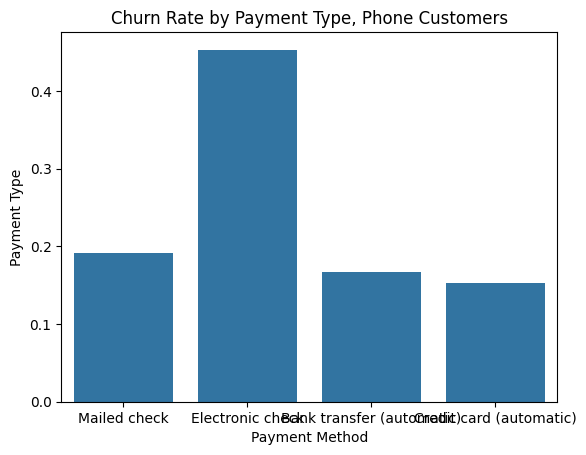

In [ ]:
sns.barplot(y='Churn Value', x='Payment Method', data=df_phone, errorbar=None)
plt.ylabel('Churn  Rate')
plt.ylabel('Payment Type')
plt.title('Churn Rate by Payment Type, Phone Customers')
plt.show()

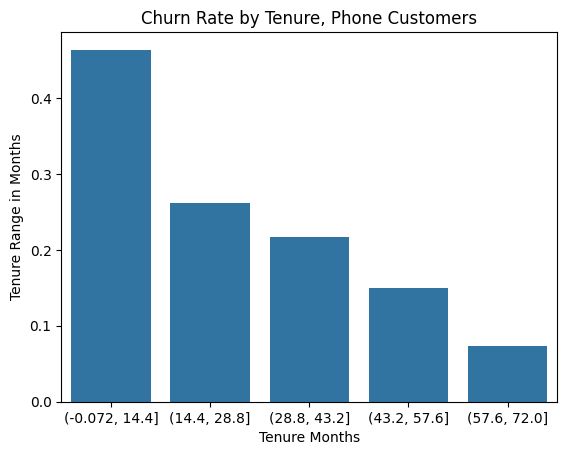

In [ ]:
sns.barplot(y='Churn Value', x=pd.cut(df_phone['Tenure Months'],bins=5), data=df_phone, errorbar=None)
plt.ylabel('Churn  Rate')
plt.ylabel('Tenure Range in Months')
plt.title('Churn Rate by Tenure, Phone Customers')
plt.show()

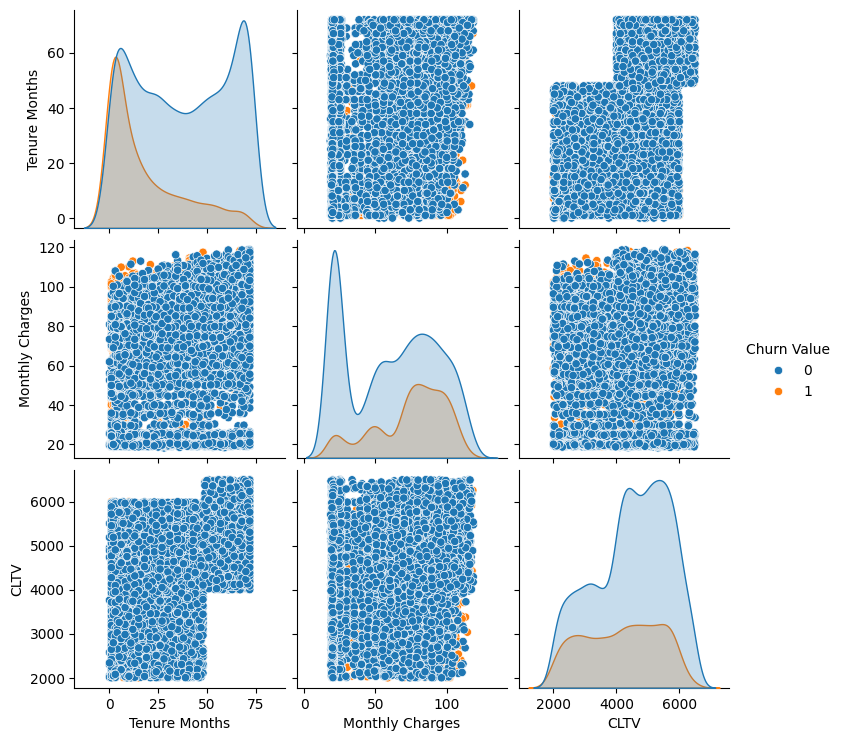

In [ ]:
pairplot = df_phone[['Tenure Months',
                     'Monthly Charges',
                     'Total Charges',
                     'CLTV',          # Customer Life Time Value
                     'Churn Value']]
sns.pairplot(pairplot, hue='Churn Value')
plt.show()

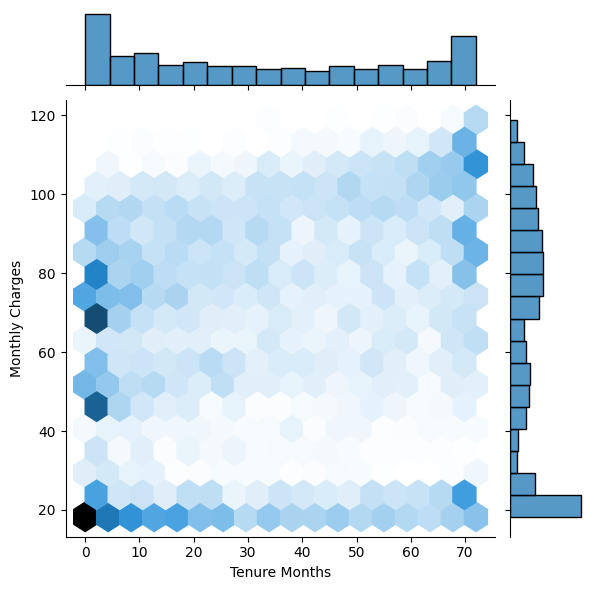

In [ ]:
sns.jointplot(x=df_phone['Tenure Months'],
              y=df_phone['Monthly Charges'],
              kind='hex')
plt.show()

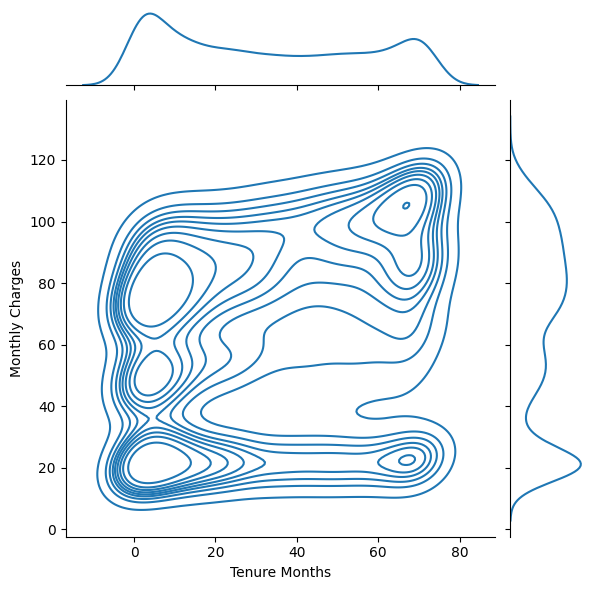

In [ ]:
sns.jointplot(x=df_phone['Tenure Months'],
              y=df_phone['Monthly Charges'],
              kind='kde')
plt.show()
#The value for `kind` can only be part of ['scatter', 'hist', 'hex', 'kde', 'reg', 'resid']

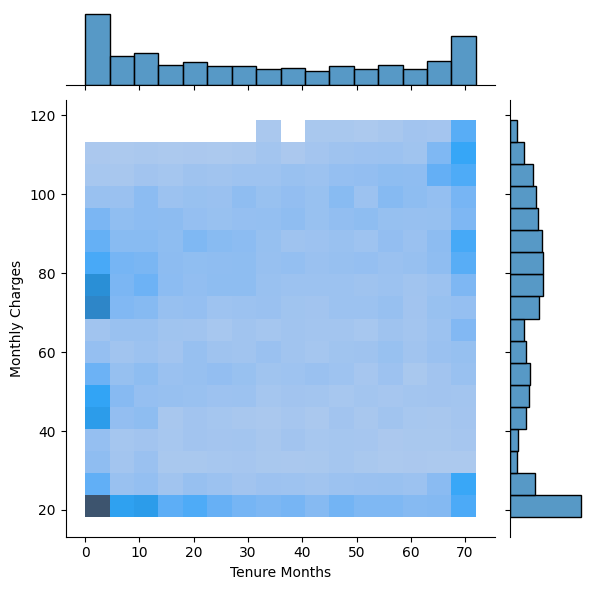

In [ ]:
sns.jointplot(x=df_phone['Tenure Months'],
              y=df_phone['Monthly Charges'],
              kind='hist')
plt.show()